**GO-ETHEREUM TOPIC ANALYSIS ABOUT SUSTAINABILITY, OPTIMIZATION, GAS AND ENERGY CONSUMPTION**



In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 14.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 998.3 kB/s eta 0:00:00
     ━━━━━━━

In [ ]:
pip install keybert

  Preparing metadata (setup.py) ... done
  Created wheel for keybert: filename=keybert-0.8.4-py3-none-any.whl size=39200 sha256=c2fb4214be9812074045a399aabfba37a0b9dc98c6704006c0a532a7c200669c
  Stored in directory: /root/.cache/pip/wheels/97/ef/4c/6588bd7072b0cc04225b40e639b991e49ebd4e21fb81f0acee
Successfully built keybert


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
import csv
import networkx as nx
import numpy as np
from matplotlib.ticker import FuncFormatter
from collections import defaultdict
from itertools import combinations
import statistics
from collections import Counter
from community import community_louvain
import random
from matplotlib.ticker import PercentFormatter
import igraph as ig
import leidenalg
from matplotlib.patches import Circle

from bertopic import BERTopic
from keybert import KeyBERT
from bertopic.representation import ZeroShotClassification
from sklearn.feature_extraction.text import CountVectorizer

from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    'font.size':20})
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [12,5]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset creation: Merge the datasets

In [ ]:
# Load CSV files
issues_df = pd.read_csv('issues.csv')
comments_df = pd.read_csv('comments.csv')

In [ ]:
# Convert the column 'created_at' in datetime format
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
comments_df['created_at'] = pd.to_datetime(comments_df['created_at'])
issues_df['updated_at'] = pd.to_datetime(issues_df['updated_at'])

In [ ]:
issues_df['time_open'] = (issues_df['updated_at'] - issues_df['created_at'])

In [ ]:
aggregated_data = {}
combined_data = []

for index, issue in issues_df.iterrows():
    issue_comments = comments_df[comments_df['issue_fk'] == issue['id']]
    issue_comments['body'] = issue_comments['body'].fillna('')
    combined_body = str(issue['body']) + '\n\n' + '\n\n'.join(issue_comments['body'].astype(str).tolist())

    combined_data.append({
        'id': issue['id'],
        'number': issue['number'],
        'title': issue['title'],
        'user_fk': issue['user_fk'],
        'repo_fk': issue['repo_fk'],
        'state': issue['state'],
        'locked': issue['locked'],
        'comments': issue['comments'],
        'created_at': issue['created_at'],
        'updated_at': issue['updated_at'],
        'author_association': issue['author_association'],
        'body_with_comments': combined_body,
    })

aggregated_data = pd.DataFrame(combined_data)
aggregated_data.to_csv(f'all_combined_data.csv', index=False)

**DESCRIPTIVE ANALYSIS OF ISSUES AND COMMENTS DATASET**

In [ ]:
all_data = pd.read_csv('/content/all_combined_data.csv')

In [ ]:
all_data['created_at'] = pd.to_datetime(all_data['created_at'])
all_data['updated_at'] = pd.to_datetime(all_data['updated_at'])
all_data['duration_days'] = (all_data['updated_at'] - all_data['created_at']).dt.days

display(all_data)

In [ ]:
# Convert 'created_at' to datetime if it's not already
all_data['created_at'] = pd.to_datetime(all_data['created_at'])

# Extract the year from 'created_at'
all_data['year'] = all_data['created_at'].dt.year

# Count the number of issues published per year
issues_per_year = all_data.groupby('year').size()
#display(issues_per_year)

# Plotting the histogram
plt.figure(figsize=(10, 6))
issues_per_year.plot(kind='bar', color='blue')
plt.title('Number of Issues Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

In [ ]:
def days_to_years(x, pos):
    return f'{x / 365:.1f}'

plt.figure(figsize=(10, 6))
plt.hist(all_data['duration_days'], bins=50, color='blue', log=True) #, edgecolor='black')
plt.title('Issue Duration')
plt.xlabel('Duration [y]')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.gca().xaxis.set_major_formatter(FuncFormatter(days_to_years))
plt.gca().spines['top'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.show()

In [ ]:
# Descriptive statistics for the lifetime of issues
lifetime_stats = all_data['duration_days'].describe()
print(lifetime_stats)

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(all_data['comments'], bins=50, color='blue', log=True) #, edgecolor='black')
plt.xscale('log')
plt.title('Popularity of the Issue')
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.gca().spines['top'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.show()

In [ ]:
comments_stats = all_data['comments'].describe()
print(comments_stats)

In [ ]:
# Counting issues with 0 comments
num_issues_with_zero_comments = (all_data['comments'] == 0).sum()
print(f"Number of issues with 0 comments: {num_issues_with_zero_comments}")

# Finding the issue with the maximum number of comments
issue_with_max_comments = all_data.loc[all_data['comments'].idxmax()]
print("Issue with the maximum number of comments:")
print(issue_with_max_comments)

In [ ]:
# Calculate the correlation between the number of comments and the duration of the issues
correlation = all_data['duration_days'].corr(all_data['comments'])
print(f"Correlation coefficient between the number of comments and the duration of issues: {correlation}")

In [ ]:
# Calculate the 75th percentile for comments
comments_75th_percentile = all_data['comments'].quantile(0.75)

# Calculate the 25th percentile for duration_days
duration_days_25th_percentile = all_data['duration_days'].quantile(0.25)

# Filter issues_data for IDs with comments > 75th percentile and duration_days < 25th percentile
filtered_issues = all_data[(all_data['comments'] > comments_75th_percentile) & (all_data['duration_days'] <= duration_days_25th_percentile)]

In [ ]:
# Issue status count
state_counts = all_data['state'].value_counts()
state_counts

In [ ]:
unique_users_count = all_data['user_fk'].nunique()
print(f"Number of unique users: {unique_users_count}")

In [ ]:
# Calculation of the number of issues created and the average number of comments per user
user_issue_counts = all_data.groupby('user_fk').size().reset_index(name='issue_count')
user_comments_mean = all_data.groupby('user_fk')['comments'].mean().reset_index(name='avg_comments_per_issue')

# Merging data to have a single DataFrame
user_analysis = pd.merge(user_issue_counts, user_comments_mean, on='user_fk')
user_analysis_sorted = user_analysis.sort_values(by=['issue_count', 'avg_comments_per_issue'], ascending=[False, False])

In [ ]:
# Counting the number of users with exactly 1 issue
users_with_one_issue = user_issue_counts[user_issue_counts['issue_count'] == 1].shape[0]
print(f"Number of users with exactly 1 issue: {users_with_one_issue}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(user_analysis_sorted['issue_count'], bins=50, color='blue', log=True) #, edgecolor='black')
plt.title('Users Activity')
plt.xlabel('Number of Open Issues per User')
plt.ylabel('Frequency')

plt.gca().spines['top'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.show()

In [ ]:
file_comments = pd.read_csv('/content/comments.csv')
display(file_comments)

In [ ]:
# Count the number of unique developers (unique 'user_fk')
num_unique_developers = file_comments['user_fk'].nunique()
print(f"Number of unique developers: {num_unique_developers}")

# Count the number of comments per developer and sort them to find the most active developers
comments_per_developer = file_comments.groupby('user_fk').size().reset_index(name='comment_count').sort_values(by='comment_count', ascending=False)

# Display the top 5 most active developers based on the number of comments
top_5_active_developers = comments_per_developer.head(5)
print("Top 5 most active developers based on the number of comments:")
print(top_5_active_developers)

In [ ]:
# Convert 'created_at', and 'updated_at' in issues_data to datetime if they are not already
all_data['created_at'] = pd.to_datetime(all_data['created_at'])
all_data['updated_at'] = pd.to_datetime(all_data['updated_at'])

# Convert 'created_at' in file_comments to datetime if it's not already
file_comments['created_at'] = pd.to_datetime(file_comments['created_at'])

# Get minimum 'created_at' for each user across both datasets
min_created_issues = all_data.groupby('user_fk')['created_at'].min().reset_index(name='first_appearance')
min_created_comments = file_comments.groupby('user_fk')['created_at'].min().reset_index(name='first_appearance')
min_created_combined = pd.concat([min_created_issues, min_created_comments])
min_created_final = min_created_combined.groupby('user_fk')['first_appearance'].min().reset_index()

# Get maximum 'updated_at' or 'created_at' from issues_data and 'created_at' from file_comments for each user
max_updated_issues = all_data.groupby('user_fk')['updated_at'].max().reset_index(name='last_appearance')
max_created_issues = all_data.groupby('user_fk')['created_at'].max().reset_index(name='last_appearance')
max_created_comments = file_comments.groupby('user_fk')['created_at'].max().reset_index(name='last_appearance')
max_combined = pd.concat([max_updated_issues, max_created_issues, max_created_comments])
max_final = max_combined.groupby('user_fk')['last_appearance'].max().reset_index()

# Merge the min and max appearance data into a single DataFrame
users_life = pd.merge(min_created_final, max_final, on='user_fk', how='outer')

In [ ]:
# Calculate the duration between first and last appearance for each user
users_life['duration'] = users_life['last_appearance'] - users_life['first_appearance']

# Calculate the average duration
average_duration = users_life['duration'].describe()

print(average_duration)

**TOPIC MODELLING PROCESS**

General unsupervised BERTopic model

In [ ]:
# Prepare documents
df = pd.read_csv("/content/all_combined_data.csv")

In [ ]:
stop_words = set(stopwords.words("english"))
additional_stopwords = ["nan", "#", "\n", "thanks", "ok"]
stop_words = stop_words.union(additional_stopwords)

df["body_with_comments"] = df["body_with_comments"].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
vectorizer_model = CountVectorizer()

In [ ]:
# BERTopic model over all data
topic_model = BERTopic(embedding_model='BAAI/bge-small-en',vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(df.body_with_comments)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# Save the trained model
topic_model.save("unsupervised_topic_model")

In [ ]:
topic_model.get_topic_freq()

In [ ]:
# Total Number of Topics in the Model
num_topics = topic_model.get_topics().shape[0]

all_topics_data = []
for topic in range(-1, num_topics):
    top_words = topic_model.get_topic(topic)
    count = topic_model.get_topic_freq(topic)
    all_topics_data.append((topic, top_words, count))

In [ ]:
filename = 'unsupervised_topics.csv'
with open(filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['topic', 'top_10_words', 'count'])
    for row in all_topics_data:
        writer.writerow(row)

Chat GPT label interpretation

In [ ]:
df_topics = pd.read_csv('/content/updated_unsupervised_topics.csv')

# Dictionary topic : label or top 10 words
topic_dictionary = dict(zip(df_topics['topic'], df_topics['label']))
top10words_dictionary = dict(zip(df_topics['topic'], df_topics['top_10_words']))

df['topic'] = topics
df['top_10_words'] = df['topic'].map(top10words_dictionary)
df['topic_name'] = df['topic'].map(topic_dictionary)

df[['id', 'title', 'user_fk', 'created_at', 'comments', 'topic', 'top_10_words', 'topic_name']].to_csv('full_data_classified.csv', index=False)

Coherence Score

In [ ]:
documents = pd.DataFrame({"Document": df.body_with_comments,
                          "ID": range(len(df.body_with_comments)),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

In [ ]:
# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

In [ ]:
# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model.get_topic(topic)]
              for topic in range(len(set(topics))-1)]

In [ ]:
# Coherence computation using CoherenceModel of Gensim
coherence_model = CoherenceModel(topics=topic_words,
                                texts=tokens,
                                corpus=corpus,
                                dictionary=dictionary,
                                coherence='c_v')
coherence_score = coherence_model.get_coherence()

It is possible to reduce the number of topics fixing the BERTopic parameter nr_topics = "auto" or 10, 20, 30, 40, 50, 60 ...

General plots

In [ ]:
df = pd.read_csv('full_data_classified.csv')
df_filtered = df[df['topic_name'] != 'Undefined']
df_filtered.to_csv('full_data_classified_filtered.csv', index=False)

In [ ]:
df_filtered = pd.read_csv('full_data_classified_filtered.csv')

total_comments_per_year = df_filtered.groupby(df_filtered['created_at'].str.slice(0, 4))['comments'].sum()
df_filtered['total_comments_per_year'] = df_filtered['created_at'].str.slice(0, 4).map(total_comments_per_year)
df_filtered['comment_percentage'] = df_filtered['comments'] / df_filtered['total_comments_per_year'] * 100

discussion_counts = df_filtered.groupby('topic_name').size().sort_values(ascending=False)
top_discussed_topics = discussion_counts.head(5)

df_filtered['year'] = pd.to_datetime(df_filtered['created_at']).dt.year

top_topics = list(top_discussed_topics.index)
df_top_topics = df_filtered[df_filtered['topic_name'].isin(top_topics)]
unique_years = sorted(df_top_topics['year'].unique())
grouped_data = df_top_topics.groupby(['year', 'topic_name']).size().unstack(fill_value=0).stack().reset_index(name='count')

grouped_data['total_discussions_per_year'] = grouped_data['year'].map(df_top_topics.groupby('year').size())
grouped_data['discussion_percentage'] = grouped_data['count'] / grouped_data['total_discussions_per_year'] * 100

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='discussion_percentage', hue='topic_name')
plt.title('Top 5 Most Discussed Topics Over Years')
plt.xlabel('Year')
plt.ylabel('Discussion Percentage')
plt.legend(title='Topic')
plt.xticks(unique_years)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered = pd.read_csv('full_data_classified_filtered.csv')
df_filtered['year'] = pd.to_datetime(df_filtered['created_at']).dt.year
total_comments_per_year = df_filtered.groupby('year')['comments'].sum()
df_filtered['comment_percentage'] = df_filtered.apply(lambda row: row['comments'] / total_comments_per_year[row['year']] * 100, axis=1)
discussion_counts = df_filtered.groupby('topic_name').size().sort_values(ascending=False)
top_discussed_topics = discussion_counts.head(5)
average_comment_percentage_per_topic = df_filtered.groupby('topic_name')['comment_percentage'].mean().sort_values(ascending=False)
top_commented_topics = average_comment_percentage_per_topic.head(5)
df_top_topics = df_filtered[df_filtered['topic_name'].isin(top_commented_topics.index)]
unique_years = sorted(df_top_topics['year'].unique())
grouped_data = df_top_topics.groupby(['year', 'topic_name']).size().unstack(fill_value=0).stack().reset_index(name='count')

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='count', hue='topic_name')
plt.title('Top 5 Most Commented Topics Over Years')
plt.xlabel('Year')
plt.ylabel('Total Comments')
plt.legend(title='Topic')
plt.xticks(unique_years)
plt.tight_layout()
plt.show()

Semi-supervised Zero-Shot Topic Modelling using KeyBERT, ZeroShotClassification and BERTopic with minimum cluster size of 30

In [ ]:
df = pd.read_csv("/content/all_combined_data.csv")

In [ ]:
stop_words = set(stopwords.words("english"))
additional_stopwords = ["nan", "#", "\n", "thanks", "ok"]
stop_words = stop_words.union(additional_stopwords)

df["body_with_comments"] = df["body_with_comments"].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
# keywords extract model
kw_model = KeyBERT()
# Use the model to extract keywords for each title
keywords = kw_model.extract_keywords(df.body_with_comments)

print(keywords)

In [ ]:
def extract_keywords(row):
    issue_keywords = []
    for keyword in row['keywords']:
        issue_keywords.append(keyword[0])
    return issue_keywords

In [ ]:
df['issue_keywords'] = keywords
df.to_csv('all_combined_data_with_keywords.csv', index=False)

In [ ]:
vocabulary = [k[0] for keyword in keywords for k in keyword]
vocabulary = list(set(vocabulary))

In [ ]:
with open('vocabolario.pkl', 'wb') as f:
    pickle.dump(vocabulary, f)

In [ ]:
with open('vocabolario.pkl', 'rb') as f:
    vocabulary = pickle.load(f)

In [ ]:
# Create your representation model
candidate_topics = ["sustainability", "energy", "gas", "consumption", "consensus", "protocols", "merge", "proof-of-work", "proof-of-stake", "pow", "pos", "optimization", "efficiency", "scalability", "green", "mining", "cost", "fee", "management"]
representation_model = ZeroShotClassification(candidate_topics, model="facebook/bart-large-mnli")

In [ ]:
vectorizer_model= CountVectorizer(vocabulary=vocabulary)
topic_model = BERTopic(embedding_model='BAAI/bge-small-en', vectorizer_model=vectorizer_model, representation_model=representation_model, min_topic_size=30)
topics, probs = topic_model.fit_transform(df.body_with_comments)

In [ ]:
# Save the trained model
topic_model.save("supervised_zeroshot_model")

In [ ]:
topic_model.get_topic_freq()

In [ ]:
num_topics = len(topics)

all_topics_data = []
for topic in range(-1, num_topics-1):
    top_words = topic_model.get_topic(topic)
    count = topic_model.get_topic_freq(topic)
    all_topics_data.append((topic, top_words, count))

In [ ]:
filename = 'supervised_zeroshot_topics.csv'
with open(filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['topic', 'top_10_words', 'count'])
    for row in all_topics_data:
        writer.writerow(row)

Coherence score of the model

In [ ]:
documents = pd.DataFrame({"Document": df.body_with_comments,
                          "ID": range(len(df.body_with_comments)),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

In [ ]:
# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

In [ ]:
# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
              for topic in range(len(set(topics))-1)]

In [ ]:
coherence_model = CoherenceModel(topics=topic_words,
                                texts=tokens,
                                corpus=corpus,
                                dictionary=dictionary,
                                coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(coherence_score)

Topic labels interpretation with Chat-GPT and upload of the data csv

In [ ]:
df = pd.read_csv("/content/all_combined_data_with_keywords.csv")

In [ ]:
df_topics = pd.read_csv('/content/updated_supervised_zeroshot_topics.csv')

# Dictionary topic : label/top words
topic_dictionary = dict(zip(df_topics['topic'], df_topics['label']))
top10words_dictionary = dict(zip(df_topics['topic'], df_topics['top_10_words']))

In [ ]:
df['topic'] = topics
df['top_10_words'] = df['topic'].map(top10words_dictionary)
df['topic_name'] = df['topic'].map(topic_dictionary)

df[['id', 'title', 'user_fk', 'created_at', 'updated_at' 'comments', 'issue_keywords', 'topic', 'top_10_words', 'topic_name']].to_csv('full_data_classified.csv', index=False)

General plots

In [ ]:
df = pd.read_csv('full_data_classified.csv')
df_filtered = df[df['topic_name'] != 'Undefined']
df_filtered.to_csv('full_data_classified_filtered.csv', index=False)

In [ ]:
df_filtered = pd.read_csv('full_data_classified_filtered.csv')
total_comments_per_year = df_filtered.groupby(df_filtered['created_at'].str.slice(0, 4))['comments'].sum()
df_filtered['total_comments_per_year'] = df_filtered['created_at'].str.slice(0, 4).map(total_comments_per_year)
df_filtered['comment_percentage'] = df_filtered['comments'] / df_filtered['total_comments_per_year'] * 100
discussion_counts = df_filtered.groupby('topic_name').size().sort_values(ascending=False)

top_discussed_topics = discussion_counts.head(5)
df_filtered['year'] = pd.to_datetime(df_filtered['created_at']).dt.year
top_topics = list(top_discussed_topics.index)
df_top_topics = df_filtered[df_filtered['topic_name'].isin(top_topics)]
unique_years = sorted(df_top_topics['year'].unique())
grouped_data = df_top_topics.groupby(['year', 'topic_name']).size().unstack(fill_value=0).stack().reset_index(name='count')

grouped_data['total_discussions_per_year'] = grouped_data['year'].map(df_top_topics.groupby('year').size())
grouped_data['discussion_percentage'] = grouped_data['count'] / grouped_data['total_discussions_per_year'] * 100

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='discussion_percentage', hue='topic_name')
plt.title('Top 5 Most Discussed Topics Over Years')
plt.xlabel('Year')
plt.ylabel('Discussion Percentage')
plt.legend(title='Topic')
plt.xticks(unique_years)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered = pd.read_csv('full_data_classified_filtered.csv')
df_filtered['year'] = pd.to_datetime(df_filtered['created_at']).dt.year
total_comments_per_year = df_filtered.groupby('year')['comments'].sum()
df_filtered['comment_percentage'] = df_filtered.apply(lambda row: row['comments'] / total_comments_per_year[row['year']] * 100, axis=1)

discussion_counts = df_filtered.groupby('topic_name').size().sort_values(ascending=False)
top_discussed_topics = discussion_counts.head(5)
average_comment_percentage_per_topic = df_filtered.groupby('topic_name')['comment_percentage'].mean().sort_values(ascending=False)
top_commented_topics = average_comment_percentage_per_topic.head(5)
df_top_topics = df_filtered[df_filtered['topic_name'].isin(top_commented_topics.index)]
unique_years = sorted(df_top_topics['year'].unique())
grouped_data = df_top_topics.groupby(['year', 'topic_name']).size().unstack(fill_value=0).stack().reset_index(name='count')

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='count', hue='topic_name')
plt.title('Top 5 Most Commented Topics Over Years')
plt.xlabel('Year')
plt.ylabel('Total Comments')
plt.legend(title='Topic')
plt.xticks(unique_years)
plt.tight_layout()
plt.show()

**SUSTAINABILITY ANALYSIS**

In [ ]:
sustainable_keywords= ['consumption', 'consensus', 'cost',
                       'efficiency', 'energy', 'fee', 'gas', 'green',
                       'management', 'merge', 'mining',
                       'optimization', 'pos', 'pow', 'proof-of-stake', 'proof-of-work', 'protocol', 'protocols',
                       'scalability', 'sustainability']

In [ ]:
filtered_sust = pd.read_csv('/content/sust_filt_data.csv')
filtered_sust = pd.merge(filtered_sust, all_data[['id', 'updated_at']], on='id', how='left')

filtered_sust['created_at'] = pd.to_datetime(filtered_sust['created_at'])
filtered_sust['updated_at'] = pd.to_datetime(filtered_sust['updated_at'])
filtered_sust['duration_days'] = (filtered_sust['updated_at'] - filtered_sust['created_at']).dt.days
display(filtered_sust)

In [ ]:
# Calculate the average of the duration_days column
average_duration_days = filtered_sust['duration_days'].mean()
# Print the average duration
print("Average duration in days:", average_duration_days)

In [ ]:
lifetime_stats2 = filtered_sust['duration_days'].describe()
print(lifetime_stats2)

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_sust['duration_days'], bins=50, color='blue', log=True) #, edgecolor='black')
plt.title('Sustainable Issue Duration')
plt.xlabel('Duration [y]')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.gca().xaxis.set_major_formatter(FuncFormatter(days_to_years))
plt.gca().spines['top'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_sust['comments'], bins=40, color='blue', log=True) #, edgecolor='black')
#plt.xscale('log')
plt.title('Popularity of the Sustainable Issues')
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.gca().spines['top'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.show()

In [ ]:
comments_df = pd.read_csv('/content/comments.csv')
display(comments_df)

In [ ]:
num_unique_users = comments_df['user_fk'].nunique()
print("Number of unique users in comments_df:", num_unique_users)

In [ ]:
# Select the required columns from filtered_sust to create the base DataFrame
sustainable_comments = filtered_sust[['id', 'title', 'user_fk', 'created_at', 'comments']].copy()

# Create the comments_mapped column
sustainable_comments['comments_mapped'] = sustainable_comments['id'].apply(
    lambda x: list(comments_df[comments_df['issue_fk'] == x]['user_fk'])
)

sustainable_comments.rename(columns={
    'id': 'issue_id',
    'title': 'issue_title',
    'user_fk': 'user_creator_issue',
    'created_at': 'created_at',
    'comments': 'comments',
    'comments_mapped': 'commentator_mapped'
}, inplace=True)

display(sustainable_comments)

In [ ]:
num_rows_with_zero_comments = (sustainable_comments['comments'] == 0).sum()
print("Number of rows with comments equal to 0:", num_rows_with_zero_comments)

In [ ]:
# Flatten all lists in the 'commentator_mapped' column and count unique elements
unique_commentators = set(x for sublist in sustainable_comments['commentator_mapped'] for x in sublist)
num_unique_commentators = len(unique_commentators)
print("Number of unique commentators:", num_unique_commentators)

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sustainable_comments['comments'], bins=40, color='blue', log=True)  # You can adjust the number of bins
plt.title('Comments per Sustainable Issue')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Adds a grid for easier readability
plt.show()

In [ ]:
print(sustainable_comments['comments'])

print('\n')

num_commentator_mapped = sustainable_comments['commentator_mapped'].apply(len)
print(num_commentator_mapped)

correlation = sustainable_comments['comments'].corr(num_commentator_mapped)
print(correlation)

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(num_commentator_mapped, bins=range(max(num_commentator_mapped)+2), color='blue', log=True)  # Bins are set from 0 to max length + 1
plt.title('Unique Developers per Sustainable Issue')
plt.xlabel('Unique Developers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Create a dictionary to count the occurrences of each user across different issues
user_issue_count = defaultdict(int)

# Iterate over each list in the commentator_mapped column along with the issue id
for index, row in sustainable_comments.iterrows():
    # Use a set to count each user only once per issue
    users_set = set(row['commentator_mapped'])
    for user in users_set:
        user_issue_count[user] += 1

# Convert the dictionary to a pandas DataFrame for better visualization and manipulation
user_issue_count_df = pd.DataFrame(list(user_issue_count.items()), columns=['User', 'Issue_Count'])

# Display the DataFrame
sorted_issue_count_list = user_issue_count_df.sort_values(by='Issue_Count', ascending=False)['Issue_Count'].tolist()

In [ ]:
mean_count = statistics.mean(sorted_issue_count_list)
print(mean_count)
median_count = statistics.median(sorted_issue_count_list)
print(median_count)

Sustainability Awareness Diagram

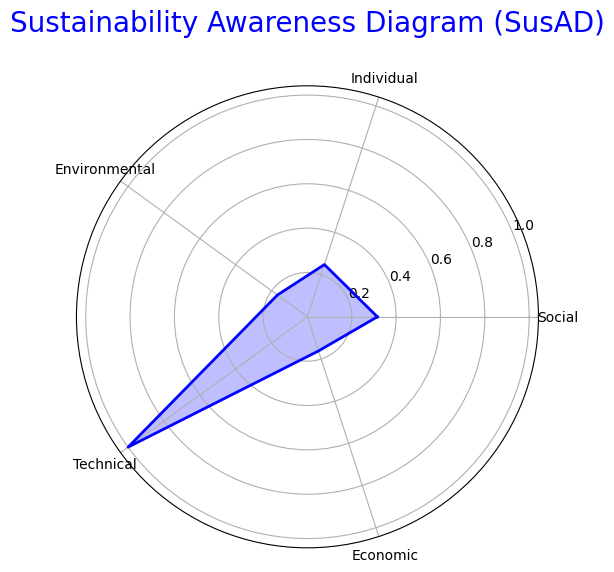

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: numbers representing the count of topics for each sustainability measure
# Assuming the "Size" in your table represents these counts.
data = {
    'Social': 756,    # Sum of all topic sizes classified as 'Social'
    'Individual': 594, # Sum of all topic sizes classified as 'Individual'
    'Environmental': 401, # Sum of all topic sizes classified as 'Environmental'
    'Technical': 2397,   # Sum of all topic sizes classified as 'Technical'
    'Economic': 388,     # Sum of all topic sizes classified as 'Economic'
}

# Normalizing the data
max_value = max(data.values())
normalized_data = {k: v / max_value for k, v in data.items()}

# There are 5 measures, so we need to set up a radar chart with 5 axes
labels=np.array(list(normalized_data.keys()))
stats=np.array(list(normalized_data.values()))

# Create a 360 degree angle array
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()

# The plot is made circular by adding the first value to the end of the array
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

# Draw the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)  # Change the color if you like

# Add the labels to the plot
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Give it a title
plt.title('Sustainability Awareness Diagram (SusAD)', size=20, color='blue', y=1.1)

# Show the plot
plt.show()


**NETWORK ANALYSIS**

Sustainability Developers Network Analysis

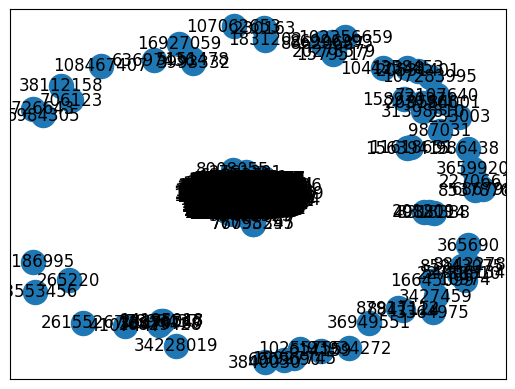

In [ ]:
# Load the datasets
issues = pd.read_csv('/content/sust_filt_data.csv')
comments = pd.read_csv('/content/comments.csv')

# Create a bipartite graph
B = nx.Graph()
# Add nodes with the bipartite attribute
B.add_nodes_from(issues['user_fk'], bipartite=0) # Developers who posted issues
B.add_nodes_from(comments['user_fk'], bipartite=1) # Developers who commented

# Add edges between developers and issues
for _, row in issues.iterrows():
    B.add_edge(row['user_fk'], row['id'])

for _, row in comments.iterrows():
    B.add_edge(row['user_fk'], row['issue_fk'])

# Project the bipartite graph onto developers nodes
G = nx.projected_graph(B, issues['user_fk'].unique())

# Plot the network
pos = nx.spring_layout(G)  # Use spring layout for positioning nodes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


In [ ]:
# Analyze the graph using degree centrality
degree_centrality = nx.degree_centrality(G)

# Find the most influential developers
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on degree centrality
print(sorted_degree_centrality[:5])

[(129561, 0.5487711799725233), (142290, 0.40986108990993747), (6915, 0.28010990688444515), (10137, 0.20531216608151429), (111600, 0.20286979087162266)]


In [ ]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Find the most influential developers
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Betweenness Centrality
print(sorted_betweenness_centrality[:5])

[(129561, 0.44322641511197386), (142290, 0.2757511170188587), (6915, 0.14954190302987067), (111600, 0.10191182894300498), (10137, 0.08501156953668283)]


In [ ]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Find the most influential developers
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Closeness Centrality
print(sorted_closeness_centrality[:5])

[(129561, 0.68382368022321), (142290, 0.6214472004352498), (6915, 0.574495142681481), (10137, 0.5470706025824589), (111600, 0.5459536570731456)]


In [ ]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the most influential developers
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Eigenvector Centrality
print(sorted_eigenvector_centrality[:5])

[(129561, 0.437517047093727), (142290, 0.33834978001978666), (6915, 0.2557748464295952), (10137, 0.18659273630220297), (111600, 0.16485208493033224)]


Analyzing all the network there is a similarity?

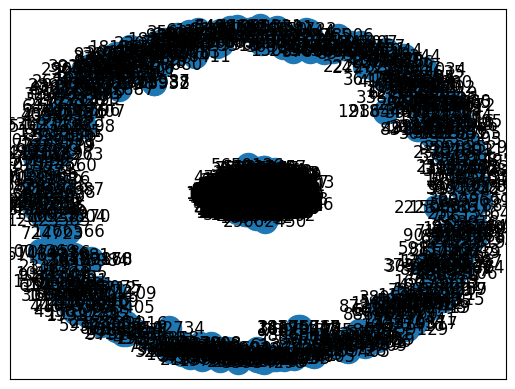

In [ ]:
# Load the datasets
issues = pd.read_csv('/content/full_data_classified_filtered.csv')
comments = pd.read_csv('/content/comments.csv')

# Create a bipartite graph
B = nx.Graph()
# Add nodes with the bipartite attribute
B.add_nodes_from(issues['user_fk'], bipartite=0) # Developers who posted issues
B.add_nodes_from(comments['user_fk'], bipartite=1) # Developers who commented

# Add edges between developers and issues
for _, row in issues.iterrows():
    B.add_edge(row['user_fk'], row['id'])

for _, row in comments.iterrows():
    B.add_edge(row['user_fk'], row['issue_fk'])

# Project the bipartite graph onto developers nodes
G = nx.projected_graph(B, issues['user_fk'].unique())

# Plot the network
pos = nx.spring_layout(G)  # Use spring layout for positioning nodes
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


In [ ]:
# Analyze the graph using degree centrality
degree_centrality = nx.degree_centrality(G)

# Find the most influential developers
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on degree centrality
print(sorted_degree_centrality[:5])

[(129561, 0.5062120010573619), (142290, 0.36901929685434837), (6915, 0.2564102564102564), (111600, 0.18583135077980437), (10137, 0.1809410520750727)]


In [ ]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Find the most influential developers
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Betweenness Centrality
print(sorted_betweenness_centrality[:5])

[(129561, 0.3943176743504064), (142290, 0.2318731863116105), (6915, 0.13125100709944068), (111600, 0.0852836330256857), (10137, 0.0626229245491546)]


In [ ]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Find the most influential developers
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Closeness Centrality
print(sorted_closeness_centrality[:5])

[(129561, 0.6430267397102873), (142290, 0.5841923943572115), (6915, 0.5440598988089845), (111600, 0.5176681593808315), (10137, 0.5167616291793881)]


In [ ]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Find the most influential developers
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most influential developers based on Eigenvector Centrality
print(sorted_eigenvector_centrality[:5])

[(129561, 0.4161849832039424), (142290, 0.32699227459528035), (6915, 0.24680294286919655), (10137, 0.19356833928491715), (111600, 0.16311278296388007)]


In [ ]:
unique_developers = set(x for sublist in sustainable_comments['commentator_mapped'] for x in sublist)
#print(unique_developers)
print(len(unique_developers))

In [ ]:
unique_issues = list(sustainable_comments['issue_id'])
#print(unique_issues)
print(len(unique_issues))

In [ ]:
B = nx.Graph()
# 0 for developers, 1 for issues
B.add_nodes_from(unique_developers, bipartite=0)
B.add_nodes_from(unique_issues, bipartite=1)

# Add edges from each issue to each developer who commented on that issue
for _, row in sustainable_comments.iterrows():
    issue_id = row['issue_id']
    for developer in row['commentator_mapped']:
        B.add_edge(developer, issue_id)

In [ ]:
adjacency_matrix = nx.bipartite.biadjacency_matrix(B, row_order=unique_developers, column_order=unique_issues)
adjacency_df = pd.DataFrame(adjacency_matrix.toarray(), index=list(unique_developers), columns=list(unique_issues))
adjacency_df.to_csv('/content/developer_issue_adjacency_matrix.csv')

In [ ]:
adjacency_df = pd.read_csv('/Users/sabrina.aufiero/Desktop/UCL_sentiment/ethereum_go/developer_issue_adjacency_matrix.csv', index_col=0)

plt.figure(figsize=(8,6))
ax = sns.heatmap(adjacency_df, annot=False, cmap='plasma', cbar=False)
plt.title('Developer - Issue Bi-adjacency Matrix')
plt.xlabel('Commented Issues')
plt.ylabel('Developers')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [ ]:
# Calculate the number of ones and the total elements
number_of_ones = adjacency_df.sum().sum()  # Sum of all entries in the DataFrame
total_elements = adjacency_df.size  # Total number of elements in the DataFrame

# Calculate density and sparsity
density = number_of_ones / total_elements
sparsity = 1 - density

# Print density and sparsity
print(f"Density of the Network: {density:.4f}")
print(f"Sparsity of the Network: {sparsity:.4f}")

In [ ]:
developer_connections = adjacency_df.sum(axis=1)
#print(len(developer_connections))
#print(developer_connections)

num_zeros = (developer_connections == 0).sum()
print("Number of developers that have commented 0 issues:", num_zeros)

In [ ]:
issues_connections = adjacency_df.sum(axis=0)
#print(len(issues_connections))
#print(issues_connections)

num_zeros_issues = (issues_connections == 0).sum()
print("Number of issues commented by 0 developers:", num_zeros_issues)

In [ ]:
# Filter out columns with 0 sum, which indicates no comments
filtered_adjacency_df = adjacency_df.loc[:, issues_connections > 0]
print(filtered_adjacency_df.shape)

On the issues layer, two issues are connected if the same developer comments on them.

In [ ]:
# Compute the transpose of the adjacency matrix
filtered_adjacency_df_transposed = filtered_adjacency_df.T

# Compute the dot product of the transposed adjacency matrix with itself
# This results in a new matrix where each element (i, j) is the number of developers that commented on both issue i and issue j
adjacency_issues = filtered_adjacency_df_transposed.dot(filtered_adjacency_df)

# Convert diagonal elements to 0 if needed to ignore self-links (i.e., an issue linked to itself)
np.fill_diagonal(adjacency_issues.values, 0)

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(adjacency_issues, annot=False, cmap='plasma', cbar=False)
plt.title('Issues Adjacency Matrix')
plt.xlabel('Issues')
plt.ylabel('Issues')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [ ]:
values_flattened = adjacency_issues.values.flatten()
value_series = pd.Series(values_flattened)
value_counts = value_series.value_counts()
sorted_value_counts = value_counts.sort_index()
print(sorted_value_counts)

is_symmetric = (adjacency_issues == adjacency_issues.T).all().all()
print("The matrix is symmetric." if is_symmetric else "The matrix is not symmetric.")

In [ ]:
topic_susaf_dict = {
 'Gas Price and Transaction Fees': 'EC/EN', 'Database State Management and Trie': 'I/T',
 'P2P Network and Ethereum Build Process': 'S/T', 'Account Security and Keystore Managemen': 'I/T',
 'Swarm Network and Manifest Management': 'S/T', 'Tracing and Debugging with Tracers': 'T',
 'Ethereum Source and Path Management': 'T', 'Website Deployment and Management with Netlify': 'T',
 'Docker Image Management and Process Handling': 'T', 'EVM (Ethereum Virtual Machine) and Stack Management': 'T',
 'Source and Path Management for Ethereum': 'T', 'Light Ethereum Subprotocol (LES) Client Logic and Capacity': 'T',
 'Peer-to-Peer Protocol and Node Discovery': 'T', 'Bootnode and Peer Management': 'S/T',
 'Peer Sync and Latency Management': 'S/T', 'Repository Management and Issue Handling': 'T',
 'Whisper Protocol and Message Handling': 'T', 'Benchmark Analysis and Optimization': 'EN/T',
 'Framework and Library Management': 'T', 'Blockchain Status and Transaction Logs': 'T',
 'Light Mode and Peer Management': 'S/T', 'Crypto Benchmarking and Performance Analysis': 'EC/T',
 'Community Support and Question Tracking': 'S/T'
}

topic_color_map = {
 'Gas Price and Transaction Fees': 'grey',

 'Crypto Benchmarking and Performance Analysis': 'darkorchid',

 'Benchmark Analysis and Optimization': 'black',

 'Database State Management and Trie': 'skyblue', 'Account Security and Keystore Managemen': 'dodgerblue', #blue


'P2P Network and Ethereum Build Process': 'olivedrab', 'Swarm Network and Manifest Management': 'yellowgreen',  #6 green
'Bootnode and Peer Management': 'darkolivegreen', 'Peer Sync and Latency Management': 'greenyellow',
'Light Mode and Peer Management': 'palegreen', 'Community Support and Question Tracking': 'forestgreen',

 'Tracing and Debugging with Tracers': 'lightcoral', 'Ethereum Source and Path Management': 'brown', #12 red to orange
 'Website Deployment and Management with Netlify': 'maroon',  'Whisper Protocol and Message Handling': 'red',
 'Docker Image Management and Process Handling': 'salmon', 'EVM (Ethereum Virtual Machine) and Stack Management': 'darksalmon',
 'Source and Path Management for Ethereum': 'coral', 'Light Ethereum Subprotocol (LES) Client Logic and Capacity': 'chocolate',
 'Peer-to-Peer Protocol and Node Discovery': 'sandybrown', 'Repository Management and Issue Handling': 'darkorange',
 'Framework and Library Management': 'burlywood', 'Blockchain Status and Transaction Logs': 'orange',
}

print(np.unique(list(topic_susaf_dict.values())))

In [ ]:
shape_dict = {
    'EC/EN': 'o',  # circle
    'EC/T': 's',   # square
    'EN/T': '^',   # triangle_up
    'I/T': 'P',    # plus (filled)
    'S/T': 'X',    # x (filled)
    'T': 'D'       # diamond
}

In [ ]:
def map_topic_to_susaf(topic_name):
    return topic_susaf_dict.get(topic_name, "Unknown")  # default to "Unknown" if topic_name not in dict
filtered_sust['susaf'] = filtered_sust['topic_name'].apply(map_topic_to_susaf)
display(filtered_sust)

In [ ]:
# Convert both to string for safe comparison
adjacency_issues.columns = adjacency_issues.columns.astype(str)
filtered_sust['id'] = filtered_sust['id'].astype(str)

G = nx.Graph()

# Add nodes with the label being the issue ID
for issue in adjacency_issues.columns:
    topic_name = filtered_sust.loc[filtered_sust['id'] == issue, 'topic_name'].values[0]
    created_at = filtered_sust.loc[filtered_sust['id'] == issue, 'created_at'].values[0]
    created_year = pd.to_datetime(filtered_sust.loc[filtered_sust['id'] == issue, 'created_at'].values[0]).year
    updated_at = filtered_sust.loc[filtered_sust['id'] == issue, 'updated_at'].values[0]
    update_year = pd.to_datetime(filtered_sust.loc[filtered_sust['id'] == issue, 'updated_at'].values[0]).year

    color = topic_color_map.get(topic_name, [1, 0, 0, 1])  # default color if topic_name not found
    susaf = filtered_sust.loc[filtered_sust['id'] == issue, 'susaf'].values[0]
    shape = shape_dict.get(susaf)
    G.add_node(issue, color=color, shape=shape, created_at=created_at, created_year=created_year, updated_at=updated_at, update_year=update_year)

# Add weighted edges between nodes only if there is a shared developer (i.e., weight > 0)
for i, row in adjacency_issues.iterrows():
    for j, weight in row.items():
        if weight > 0 and i != j:  # Ensure no self-loops unless desired
            G.add_edge(i, j, weight=weight)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visual separation
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
print(min(edge_widths))
print(max(edge_widths))

nx.draw_networkx_nodes(G, pos, node_color='darkblue', node_size=80, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=[weight for weight in edge_widths], edge_color='gray')
#nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

#plt.title('Weighted Network of Issues')
plt.axis('off')

plt.show()

In [ ]:
# Find the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Drawing the network of the largest connected component
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42, k=0.45)  # Layout for better visual separation
edge_widths = [0.1 * subgraph[u][v]['weight'] for u, v in subgraph.edges()]
print(subgraph)

# Draw nodes and edges with weights
nx.draw_networkx_nodes(subgraph, pos, node_color='darkblue', node_size=80, edgecolors='black')
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color='gray')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_family='sans-serif')

#plt.title('Weighted Network of Issues (Largest Connected Component)')
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
# Find the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Drawing the network of the largest connected component
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42, k=0.45) #0.45  # Layout for better visual separation
# Draw nodes with varying shapes
for shape in set(shape_dict.values()):
    # Collect nodes for each shape
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[node for node in subgraph if subgraph.nodes[node]['shape'] == shape],
                           node_shape=shape, node_color=[subgraph.nodes[n]['color'] for n in subgraph if subgraph.nodes[n]['shape'] == shape],
                           node_size=60, edgecolors='black')

# Draw edges
edge_widths = [0.1 * subgraph[u][v]['weight'] for u, v in subgraph.edges()]
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color='gray')

plt.axis('off')
plt.show()

In [ ]:
#  Convert NetworkX graph to igraph
def convert_networkx_to_igraph(nx_graph):
    # Create a mapping from node labels to integer indices
    mapping = {node: i for i, node in enumerate(nx_graph.nodes())}
    # Create the igraph graph
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(len(nx_graph))
    ig_graph.add_edges([(mapping[edge[0]], mapping[edge[1]]) for edge in nx_graph.edges()])

    # Optionally, add edge weights and node attributes if they exist
    if 'weight' in nx.get_edge_attributes(nx_graph, 'weight'):
        ig_graph.es['weight'] = [nx_graph[u][v]['weight'] for u, v in nx_graph.edges()]

    return ig_graph, mapping

# Convert the NetworkX graph to an igraph graph
ig_subgraph, mapping = convert_networkx_to_igraph(subgraph)

# Apply the Leiden algorithm
partition = leidenalg.find_partition(ig_subgraph, leidenalg.ModularityVertexPartition)

# Print the results
community_dict = {}
for idx, membership in enumerate(partition.membership):
    node = list(mapping.keys())[list(mapping.values()).index(idx)]
    community_dict[node] = membership

#print("Node to community mapping:", community_dict)

In [ ]:
# Optionally, map the results back to the original NetworkX graph:
for node in subgraph.nodes():
    subgraph.nodes[node]['community'] = community_dict[node]

In [ ]:
num_communities = len(partition)
community_sizes = partition.sizes()

In [ ]:
print("Number of communities detected:", num_communities)
print("Sizes of each community:", community_sizes)

communities = {node: membership for node, membership in zip(subgraph.nodes(), partition.membership)}

In [ ]:
community_colors = {
    0: plt.cm.tab20b(0/20),   # Blue
    1: plt.cm.tab20b(4/20),   # Green
    2: plt.cm.tab20b(8/20),   # Yellow
    3: plt.cm.tab20b(12/20),  # Red
    4: plt.cm.tab20b(16/20), # Purple
    5: 'grey'            # Default for any subsequent communities
}

# Set the default color for communities not explicitly listed in the dictionary
default_color = 'black'

# Assign colors based on community IDs detected by Leiden algorithm
num_communities = len(set(partition.membership))  # Get unique community IDs from membership
print(num_communities)

for idx, community_id in enumerate(set(partition.membership)):
    if community_id not in community_colors:
        community_colors[community_id] = default_color

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42, k=0.45)

# Draw nodes with colors based on their community
node_colors = [community_colors[communities[node]] for node in subgraph.nodes()]
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=60, edgecolors='black')

edge_widths = [0.1 * subgraph[u][v]['weight'] for u, v in subgraph.edges()]

nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color='gray')

plt.axis('off')
plt.show()

In [ ]:
adj_matrix_component = nx.adjacency_matrix(subgraph)
adj_df_component = pd.DataFrame(adj_matrix_component.todense(), index=list(subgraph.nodes()), columns=list(subgraph.nodes()))

In [ ]:
def compute_in_density(adj_df_component, communities):
    """
    Computes the in-density for each community based on the provided adjacency matrix.

    Parameters:
    - adj_df_component: Pandas DataFrame representing the adjacency matrix of the network.
    - communities: Dictionary mapping node identifiers to their respective community.

    Returns:
    - Dictionary with community identifiers as keys and their respective in-density as values.
    """
    in_density = {}
    for community_id in set(communities.values()):
        # Get the nodes in this community
        nodes_in_community = [node for node, community in communities.items() if community == community_id]
        # Subset the adjacency matrix to only include nodes in this community
        sub_adj_matrix = adj_df_component.loc[nodes_in_community, nodes_in_community]
        # Convert weights to 1 (for non-zero weights) or 0 (for zero weights)
        binary_matrix = sub_adj_matrix.values > 0
        # Calculate the sum of all off-diagonal elements (i.e., j != k)
        total_connections = np.sum(binary_matrix) - np.trace(binary_matrix)
        # Number of possible connections (excluding self-loops)
        num_possible_connections = len(nodes_in_community) * (len(nodes_in_community) - 1)
        # Compute in-density for the community
        if num_possible_connections > 0:  # Avoid division by zero
            community_density = total_connections / num_possible_connections
        else:
            community_density = 0  # This handles the case with one node

        in_density[community_id] = community_density

    return in_density

In [ ]:
def compute_out_density(adj_df_component, communities):
    """
    Computes the out-density for each community based on the provided adjacency matrix.

    Parameters:
    - adj_df_component: Pandas DataFrame representing the adjacency matrix of the network.
    - communities: Dictionary mapping node identifiers to their respective community.

    Returns:
    - Dictionary with community identifiers as keys and their respective out-density as values.
    """
    out_density = {}
    total_nodes = len(adj_df_component)  # Total number of nodes in the network

    for community_id in set(communities.values()):
        # Get the nodes in this community
        nodes_in_community = [node for node, community in communities.items() if community == community_id]
        # Get the nodes not in this community
        nodes_not_in_community = [node for node, community in communities.items() if community != community_id]

        # Subset the adjacency matrix to include only edges from nodes in the community to nodes outside the community
        sub_adj_matrix = adj_df_component.loc[nodes_in_community, nodes_not_in_community]

        # Convert weights to 1 (for non-zero weights) or 0 (for zero weights)
        binary_matrix = sub_adj_matrix.values > 0

        # Calculate the sum of all relevant elements
        total_outgoing_connections = np.sum(binary_matrix)

        # Compute the denominator as |S_i| * (N - |S_i|)
        num_nodes_in_community = len(nodes_in_community)
        normalization_factor = num_nodes_in_community * (total_nodes - num_nodes_in_community)

        # Compute out-density for the community
        if normalization_factor > 0:  # Avoid division by zero
            community_out_density = total_outgoing_connections / normalization_factor
        else:
            community_out_density = 0  # This handles the case with no nodes or all nodes in one community

        # Store the result
        out_density[community_id] = community_out_density

    return out_density

In [ ]:
in_densities = []
out_densities = []
community_sizes_list = partition.sizes()
community_sizes = {i: size for i, size in enumerate(community_sizes_list)}
sizes = []
colors = []
#in_density_random_flat = [density for sublist in in_density_random for density in sublist.values()]
#out_density_random_flat = [density for sublist in out_density_random for density in sublist.values()]

for community_id in community_sizes:
    if community_id in in_density_og:
        in_densities.append(in_density_og[community_id])
        out_densities.append(out_density_og[community_id])
        sizes.append(community_sizes[community_id] * 2)
        colors.append(community_colors[community_id])

plt.figure(figsize=(10, 6))
for i in range(len(in_densities)):
    plt.scatter(in_densities[i], out_densities[i], s=sizes[i], color=colors[i], alpha=1)
plt.plot([0, 1], [0, 1], 'r--')


# Using hexbin to create a density plot
#hb = plt.hexbin(in_density_random_flat, out_density_random_flat, gridsize=500, cmap='Reds', bins='log')
#cb = plt.colorbar(hb)
#cb.set_label('log10(density)')


plt.xlabel('In-Cluster Density')
plt.ylabel('Out-Cluster Density')
#plt.title('In vs. Out Cluster Density with Marker Size Proportional to Community Size')
plt.ylim(0, 0.3)
plt.grid(False)

plt.show()

In [ ]:
node_susaf = filtered_sust.set_index('id')['susaf'].to_dict()

In [ ]:
filtered_node_susaf = {key: node_susaf[key] for key in communities if key in node_susaf}
df = pd.DataFrame({
    'Node': communities.keys(),
    'Community': communities.values(),
    'Measure': [filtered_node_susaf[node] for node in communities]
})

plot_data = df.groupby(['Community', 'Measure']).size().unstack(fill_value=0)
#ax=plot_data.plot(kind='bar', stacked=True, color=['blue', 'orange', 'red', 'black', 'yellow', 'purple'])
# changed to stacked=True
ax=plot_data.plot(kind='bar', stacked=False, color=['blue', 'orange', 'red', 'black', 'yellow', 'purple'], edgecolor='black',figsize=(12, 6))


plt.xlabel(None)
plt.ylabel('SusAF Composition', size=25)
#plt.title('Counts of Measures by Community')
tick_labels = ['Community {}'.format(i) for i in plot_data.index]
ax.set_xticks(range(len(plot_data.index)))
ax.set_xticklabels(tick_labels, rotation=0)

for i, ticklabel in enumerate(ax.get_xticklabels()):
    ticklabel.set_color(community_colors.get(plot_data.index[i], 'grey'))
ax.legend().set_visible(True)
#plt.legend(title='SusAF Measure')
plt.show()

In [ ]:
filtered_node_susaf = {key: node_susaf[key] for key in communities if key in node_susaf}
df = pd.DataFrame({
    'Node': communities.keys(),
    'Community': communities.values(),
    'Measure': [filtered_node_susaf[node] for node in communities]
})

plot_data = df.groupby(['Community', 'Measure']).size().unstack(fill_value=0)
#ax=plot_data.plot(kind='bar', stacked=True, color=['blue', 'orange', 'red', 'black', 'yellow', 'purple'])
# changed to stacked=True
ax=plot_data.plot(kind='bar', stacked=False, color=['blue', 'orange', 'red', 'black', 'yellow', 'purple'], edgecolor='black',figsize=(12, 6))


plt.xlabel(None)
plt.ylabel('SusAF Composition', size=25)
#plt.title('Counts of Measures by Community')
tick_labels = ['Community {}'.format(i) for i in plot_data.index]
ax.set_xticks(range(len(plot_data.index)))
ax.set_xticklabels(tick_labels, rotation=0)

for i, ticklabel in enumerate(ax.get_xticklabels()):
    ticklabel.set_color(community_colors.get(plot_data.index[i], 'grey'))
ax.legend().set_visible(True)
#plt.legend(title='SusAF Measure')
plt.show()